In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pyproj
import numpy as np

# Compare euclidean method vs. Map projection

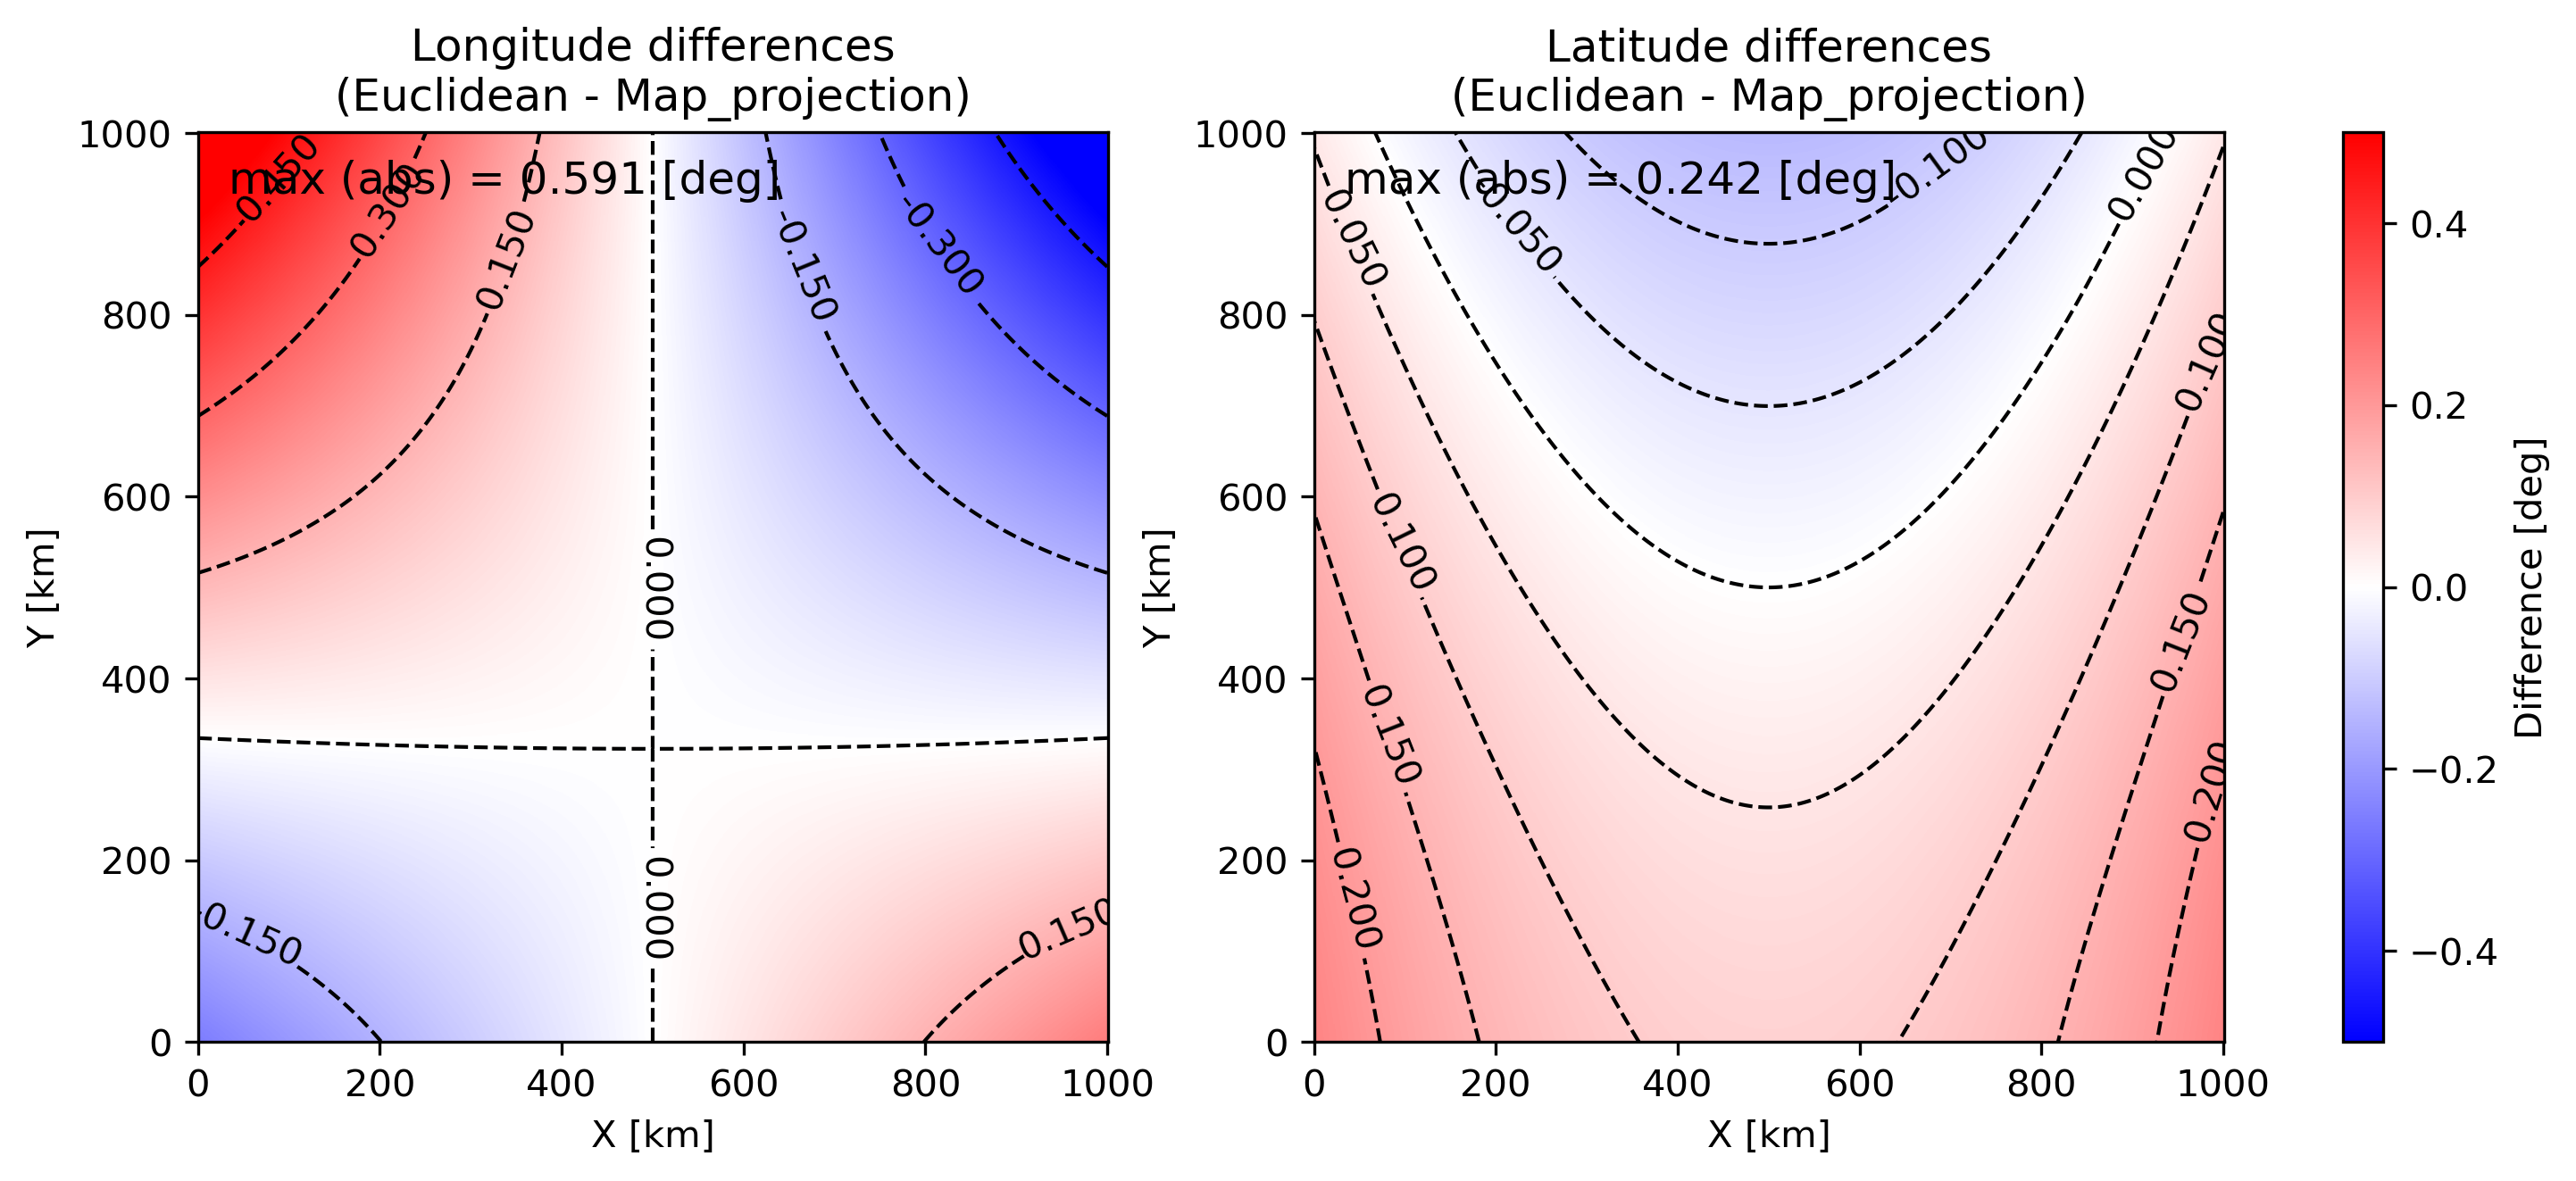

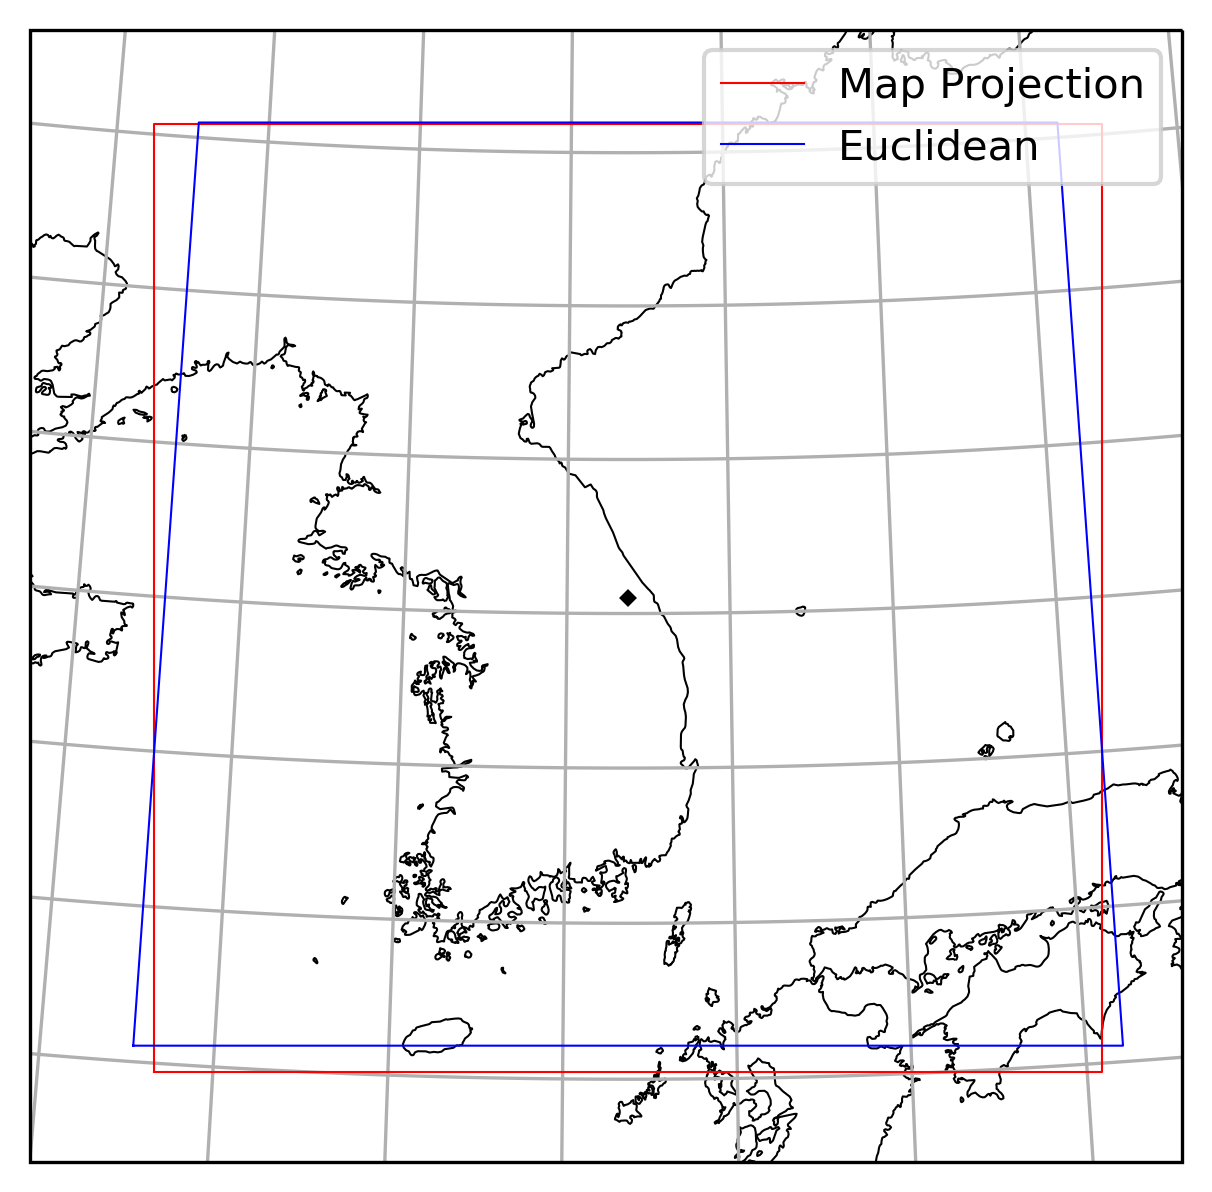

In [2]:
clon = 128.75
clat = 37.65
dx, dy = 1000, 1000
nx, ny = 1001, 1001
false_x = false_y = np.int(nx/2) * dx

arad = 6371.00877
meter2lon = 1. / (np.deg2rad(arad * 1000) * np.cos(np.deg2rad(clat)))
meter2lat = 1. / np.deg2rad(arad * 1000)

proj = ccrs.LambertConformal(central_longitude=clon, central_latitude=clat,
                             standard_parallels=(30,60),
                             false_easting=false_x, false_northing=false_y,
                             globe=ccrs.Globe(ellipse=None, semimajor_axis=6371008.77, semiminor_axis=6371008.77))
x2d, y2d = np.meshgrid(np.arange(0,nx*dx,dx), np.arange(0,ny*dy,dy))
converter = pyproj.Proj(proj.proj4_init)
lon2d, lat2d = converter(x2d, y2d, inverse=True)

lon2d_eucl = (x2d - false_x) * meter2lon + clon
lat2d_eucl = (y2d - false_y) * meter2lat + clat

londif = lon2d_eucl - lon2d
latdif = lat2d_eucl - lat2d

values = [londif, latdif]
titles = ['Longitude', 'Latitude']

# FIG 1
fig = plt.figure(figsize=(10,4.5), dpi=300)
gs = fig.add_gridspec(ncols=2, nrows=1, right=0.95, wspace=0.02)
cgs = fig.add_gridspec(left=0.96, right=0.975)
for i, value in enumerate(values):
    ax = plt.subplot(gs[i])
    cs = ax.contour(value, colors='black', linestyles='dashed', linewidths=1.0)
    ax.clabel(cs, inline=1, fontsize=10)
    pm = ax.pcolormesh(np.arange(0,nx+0.01), np.arange(0,ny+0.01), value, cmap=plt.get_cmap('bwr'), vmax=0.5, vmin=-0.5)
    ax.set_xlabel('X [km]')
    ax.set_ylabel('Y [km]')
    ax.set_aspect('equal')
    ax.text(nx/30., nx*14/15., f'max (abs) = {np.max(np.abs(value)):.3f} [deg]', fontsize=12)
    
    ax.set_title(f'{titles[i]} differences\n(Euclidean - Map_projection)')
cax = plt.subplot(cgs[0])
plt.colorbar(pm, cax=cax).set_label('Difference [deg]')
plt.show()

# FIG 2
fig = plt.figure(figsize=(5,5), dpi=300)
ax = plt.subplot(projection=proj)
ax.set_extent([122, 135, 32, 43], crs=ccrs.PlateCarree())
# ax.set_extent([clon-1.5, clon+1.5, clat-1.0, clat+1.0], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=0.5)
ax.plot([clon], [clat], transform=ccrs.PlateCarree(), markersize=2, marker='D', color='black')
for lon, lat, lab, color in [(lon2d, lat2d, 'Map Projection', 'red'), (lon2d_eucl, lat2d_eucl, 'Euclidean', 'blue')]:
    ax.plot([lon[0,0], lon[0,-1], lon[-1,-1], lon[-1,0], lon[0,0]],
            [lat[0,0], lat[0,-1], lat[-1,-1], lat[-1,0], lat[0,0]],
            transform=ccrs.PlateCarree(),
            label=lab,
            linewidth=0.5,
            color=color)
ax.legend(loc='upper right')
ax.gridlines()